In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Explora os sinais e define a função

## explora os sinais 

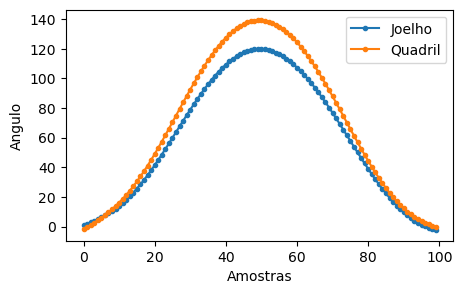

In [4]:
# essa celula serve para explorar o sinal e definir as metricas a serem extraidas
# le um sinal de exemplo
sinal = pd.read_csv('./data/squat_data/bipodal/bipodal_1.csv')

# cria figura para receber elementos graficos - a vantagem de criar figura e area de plotagem é definir parametros especificos
# fig = plt.figure(dpi=300)
# ax = plt.axes(projection='3d')
# existe função que permite criar figura e eixos, com alguma personalização
fig,ax = plt.subplots(1,1,figsize=(5,3),dpi=100)
# a função plot é a mais generica para inclusão de linhas. É possivel usar etiquetas que podem alimentar uma legenda automatica 
ax.plot(sinal['Knee_Angle'],marker='.',label='Joelho')
ax.plot(sinal['Hip_Angle'],marker='.',label='Quadril')
ax.legend()
# ajusta elementos de comunicação gráfica
ax.set_xlabel('Amostras')
ax.set_ylabel('Angulo')
# extrai algumas informações
# o pico do angulo de cada articulação
angulo_pico_joelho = sinal['Knee_Angle'].max()
angulo_pico_quadril = sinal['Hip_Angle'].max()
# obtem o momento de ocorrencia do pico
momento_pico_joelho = sinal['Knee_Angle'].argmax()
momento_pico_quadril = sinal['Hip_Angle'].argmax()

In [5]:
# define a função - adiciona um parametro para controlar a exibição
def extrair_dados_agachamento(sinal,exibir=False):
    # o pico do angulo de cada articulação
    angulo_pico_joelho = sinal['Knee_Angle'].max()
    angulo_pico_quadril = sinal['Hip_Angle'].max()
    # obtem o momento de ocorrencia do pico
    momento_pico_joelho = sinal['Knee_Angle'].argmax()
    momento_pico_quadril = sinal['Hip_Angle'].argmax()

    if exibir:
        # existe função que permite criar figura e eixos, com alguma personalização
        fig,ax = plt.subplots(1,1,figsize=(5,3),dpi=100)
        # a função plot é a mais generica para inclusão de linhas. É possivel usar etiquetas que podem alimentar uma legenda automatica 
        ax.plot(sinal['Knee_Angle'],marker='.',label='Joelho')
        ax.plot(sinal['Hip_Angle'],marker='.',label='Quadril')
        ax.legend()
        # ajusta elementos de comunicação gráfica
        ax.set_xlabel('Amostras')
        ax.set_ylabel('Angulo')
    
    # retorna as informaçoes
    return [angulo_pico_joelho, angulo_pico_quadril]

In [6]:
# testa a função
extrair_dados_agachamento(sinal)

[119.86008042234457, 139.31052396849432]

# Utiliza a função para extrair os dados

In [8]:
# define o diretorio que contem os dados dos testes bipodais
diretorio_base = './data/squat_data/bipodal/'

# cria uma estrutura para receber os dados
dados_bipodal = pd.DataFrame(columns=['angulo pico joelho', 'angulo pico quadril'])

# passa pelos arquivos no diretorio
for file_name in (os.listdir(diretorio_base)):
    # le cada arquivo
    sinal = pd.read_csv(os.path.join(diretorio_base,file_name))
    # aplica a função
    medidas = extrair_dados_agachamento(sinal)
    # insere nos dados
    dados_bipodal.loc[file_name] = medidas

# mostra os dados
dados_bipodal

,angulo pico joelho,angulo pico quadril
bipodal_1.csv,119.860080,139.310524
bipodal_10.csv,120.259486,139.628018
bipodal_2.csv,120.397792,140.156718
bipodal_3.csv,120.165837,139.805063
bipodal_4.csv,119.768892,140.085221
bipodal_5.csv,120.292818,139.897577
bipodal_6.csv,119.927398,140.248756
bipodal_7.csv,118.788043,140.210983
bipodal_8.csv,120.362133,139.819478
bipodal_9.csv,120.176174,139.926160


In [9]:
# repete os procedimentos com os dados unipodais
diretorio_base = './data/squat_data/unipodal/'

# cria uma estrutura para receber os dados
dados_unipodal = pd.DataFrame(columns=['angulo pico joelho', 'angulo pico quadril'])

# passa pelos arquivos no diretorio
for file_name in (os.listdir(diretorio_base)):
    # le cada arquivo
    sinal = pd.read_csv(os.path.join(diretorio_base,file_name))
    # aplica a função
    medidas = extrair_dados_agachamento(sinal)
    # insere nos dados
    dados_unipodal.loc[file_name] = medidas

# mostra os dados
dados_unipodal

,angulo pico joelho,angulo pico quadril
unipodal_1.csv,90.644585,110.314728
unipodal_10.csv,89.759062,110.363670
unipodal_2.csv,89.607784,110.059615
unipodal_3.csv,90.094590,110.181817
unipodal_4.csv,90.810356,110.454169
unipodal_5.csv,90.326886,110.276944
unipodal_6.csv,90.433387,110.203124
unipodal_7.csv,89.552872,111.259336
unipodal_8.csv,90.241805,109.790338
unipodal_9.csv,89.919688,109.835049


In [10]:
# identifica o fator apoio para unir os dados
dados_bipodal['base'] = 'Bipodal'
dados_unipodal['base'] = 'Unipodal'
# junta e salva
dados = pd.concat([dados_bipodal,dados_unipodal])
# converte o indice em coluna
dados = dados.reset_index()
# salva para a analise
dados.to_csv('./data/dados_agachamento_discretizado.csv',index=False)